In [44]:
# Installing conda
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  17844      0 --:--:-- --:--:-- --:--:-- 17911


python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
remove current miniconda
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda



In [45]:
# Installing Deepchem
!pip install --pre deepchem
import deepchem
deepchem.__version__

'2.8.1.dev'

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/BBB dataset/bbb_cns_train.csv')
val=pd.read_csv('/content/drive/MyDrive/BBB dataset/bbb_cns_val.csv')
test=pd.read_csv('/content/drive/MyDrive/BBB dataset/bbb_cns_test.csv')

In [ ]:
train.head()

,smiles_standarized,label,group
0,O=NN(CCCl)C(=O)NC1CCC(=O)NC1=O,-2.8,training
1,CCCN(CCC)S(=O)(=O)c1ccc(C(=O)O)cc1,-3.9,training
2,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,-3.5,training
3,CN=C(NC#N)NCCSCc1[nH]cnc1C,-4.1,training
4,O=c1[nH]cnc2c1ncn2[C@H]1CC[C@@H](CO)O1,-4.5,training


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('smiles_standarized').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['smiles_standarized'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='label', y='smiles_standarized', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
from deepchem.utils.save import load_from_disk

In [49]:
tasks = ["label"]
smiles_field = "smiles_standarized"
featurizer = deepchem.feat.ConvMolFeaturizer()

In [50]:
loader = deepchem.data.CSVLoader(tasks=tasks, smiles_field=smiles_field, featurizer=featurizer)
train_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_train.csv')
test_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_test.csv')
valid_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_val.csv')

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


In [53]:
normalizer = deepchem.trans.NormalizationTransformer(transform_y=True,
                                                         dataset=train_dataset,
                                                         move_mean=True)
train_dataset = normalizer.transform(train_dataset)
test_dataset = normalizer.transform(test_dataset)
valid_dataset = normalizer.transform(valid_dataset)

In [54]:
print(f"Size of the training data: {len(train_dataset.ids)}")
print(f"Size of the test data: {len(test_dataset.ids)}")
print(f"Size of the validation data: {len(valid_dataset.ids)}")

Size of the training data: 122
Size of the test data: 15
Size of the validation data: 16


In [ ]:
# GraphConvModel is a GNN model based on
# Duvenaud, David K., et al. "Convolutional networks on graphs for
# learning molecular fingerprints."
from deepchem.models import GraphConvModel
graph_conv = GraphConvModel(1,
                            batch_size=50,
                            mode="regression")
# Defining metric. Closer to 1 is better
metric = deepchem.metrics.Metric(deepchem.metrics.pearson_r2_score)


In [ ]:
# Fitting the model
graph_conv.fit(train_dataset, nb_epoch=10)

0.5788612365722656

In [ ]:
train_scores = graph_conv.evaluate(train_dataset, [metric])
val_scores = graph_conv.evaluate(valid_dataset, [metric])
test_scores = graph_conv.evaluate(test_dataset, [metric])

print("Train Scores:", train_scores)
print("Validation Scores:", val_scores)
print("Test Scores:", test_scores)

Train Scores: {'pearson_r2_score': 0.17698217101991393}
Validation Scores: {'pearson_r2_score': 0.08790554049234547}
Test Scores: {'pearson_r2_score': 0.17464836637567369}


In [ ]:
# Define the model with adjusted hyperparameters
graph_conv = GraphConvModel(1, batch_size=32, mode="regression", learning_rate=0.001)

# Train the model with more epochs
graph_conv.fit(train_dataset, nb_epoch=100)

# Evaluate the model again
train_scores = graph_conv.evaluate(train_dataset, [metric])
val_scores = graph_conv.evaluate(valid_dataset, [metric])
test_scores = graph_conv.evaluate(test_dataset, [metric])

print("Train Scores:", train_scores)
print("Validation Scores:", val_scores)
print("Test Scores:", test_scores)


Train Scores: {'pearson_r2_score': 0.9554574020062845}
Validation Scores: {'pearson_r2_score': 0.2574199252888094}
Test Scores: {'pearson_r2_score': 0.20842602000847724}


In [ ]:
# Define the model with adjusted hyperparameters
graph_conv = GraphConvModel(1, batch_size=32, mode="regression", learning_rate=0.05)

# Train the model with more epochs
graph_conv.fit(train_dataset, nb_epoch=100)

# Evaluate the model again
train_scores = graph_conv.evaluate(train_dataset, [metric])
val_scores = graph_conv.evaluate(valid_dataset, [metric])
test_scores = graph_conv.evaluate(test_dataset, [metric])

print("Train Scores:", train_scores)
print("Validation Scores:", val_scores)
print("Test Scores:", test_scores)


Train Scores: {'pearson_r2_score': 0.8195185496914086}
Validation Scores: {'pearson_r2_score': 0.4778627051447184}
Test Scores: {'pearson_r2_score': 0.39650936819794474}


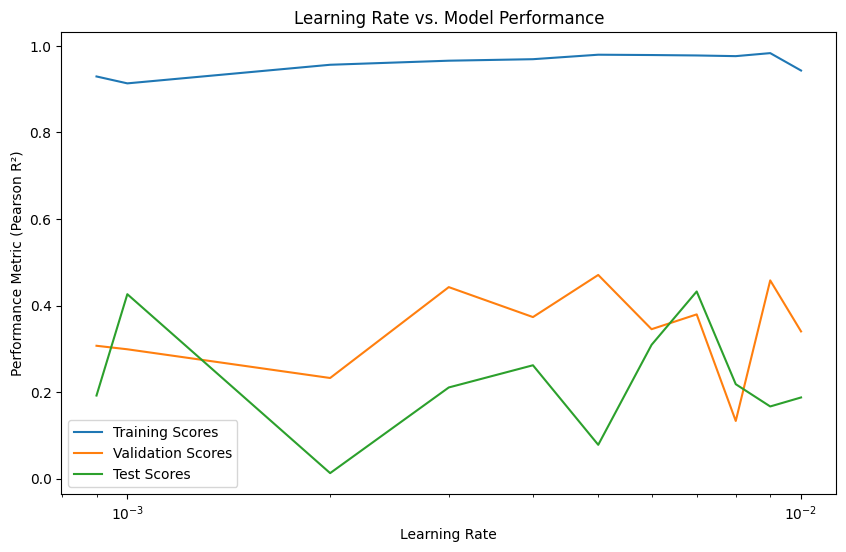

In [ ]:
import matplotlib.pyplot as plt
from deepchem.models import GraphConvModel
from deepchem.metrics import Metric
from deepchem.data.datasets import NumpyDataset

# Define your metric (e.g., Pearson R² score)
metric = Metric(deepchem.metrics.pearson_r2_score)

# Define the range of learning rates to explore
learning_rates = [0.0009,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]

# Initialize lists to store performance metrics
train_scores = []
val_scores = []
test_scores = []

# Loop through each learning rate and train the model
for lr in learning_rates:
    # Define and compile the model with the current learning rate
    graph_conv = GraphConvModel(1, batch_size=32, mode="regression", learning_rate=lr)

    # Train the model with a fixed number of epochs
    graph_conv.fit(train_dataset, nb_epoch=100)

    # Evaluate the model on training, validation, and test sets
    train_score = graph_conv.evaluate(train_dataset, [metric])
    val_score = graph_conv.evaluate(valid_dataset, [metric])
    test_score = graph_conv.evaluate(test_dataset, [metric])

    # Store the scores for plotting
    train_scores.append(train_score['pearson_r2_score'])
    val_scores.append(val_score['pearson_r2_score'])
    test_scores.append(test_score['pearson_r2_score'])

# Plotting the learning rate vs. performance metrics
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores, label='Training Scores')
plt.plot(learning_rates, val_scores, label='Validation Scores')
plt.plot(learning_rates, test_scores, label='Test Scores')
plt.xlabel('Learning Rate')
plt.ylabel('Performance Metric (Pearson R²)')
plt.title('Learning Rate vs. Model Performance')
plt.legend()
plt.xscale('log')  # Using a logarithmic scale for learning rates
plt.show()


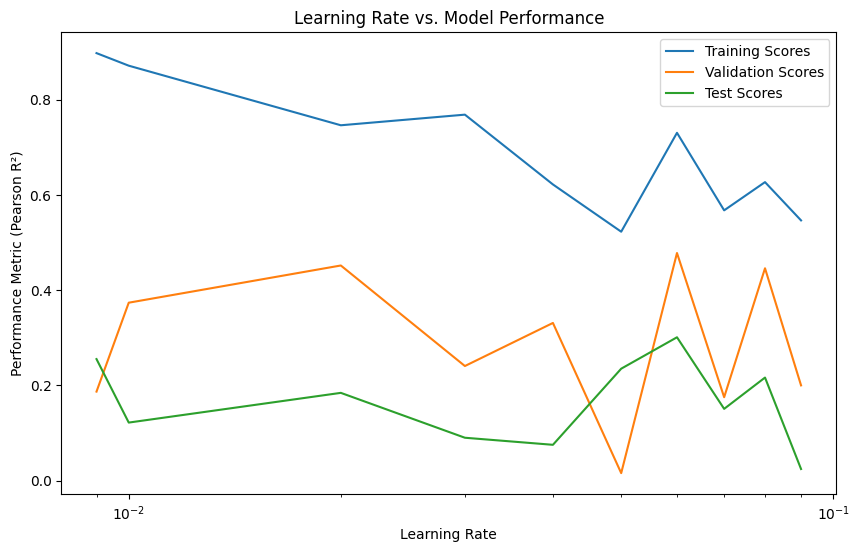

In [ ]:
import matplotlib.pyplot as plt
from deepchem.models import GraphConvModel
from deepchem.metrics import Metric
from deepchem.data.datasets import NumpyDataset
from sklearn.model_selection import train_test_split

# Assuming train_dataset, valid_dataset, test_dataset are already defined

# Define your metric (e.g., Pearson R² score)
metric = Metric(deepchem.metrics.pearson_r2_score)

# Define the range of learning rates to explore
learning_rates = [0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

# Initialize lists to store performance metrics
train_scores = []
val_scores = []
test_scores = []

# Loop through each learning rate and train the model
for lr in learning_rates:
    # Define and compile the model with the current learning rate
    graph_conv = GraphConvModel(
        n_tasks=1,
        batch_size=32,
        mode="regression",
        learning_rate=lr,
        dropout=0.25,  # Adding dropout regularization
        weight_decay_penalty=0.01  # Adding L2 regularization
    )

    # Train the model with a fixed number of epochs
    graph_conv.fit(train_dataset, nb_epoch=100)

    # Evaluate the model on training, validation, and test sets
    train_score = graph_conv.evaluate(train_dataset, [metric])
    val_score = graph_conv.evaluate(valid_dataset, [metric])
    test_score = graph_conv.evaluate(test_dataset, [metric])

    # Store the scores for plotting
    train_scores.append(train_score['pearson_r2_score'])
    val_scores.append(val_score['pearson_r2_score'])
    test_scores.append(test_score['pearson_r2_score'])

# Plotting the learning rate vs. performance metrics
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, train_scores, label='Training Scores')
plt.plot(learning_rates, val_scores, label='Validation Scores')
plt.plot(learning_rates, test_scores, label='Test Scores')
plt.xlabel('Learning Rate')
plt.ylabel('Performance Metric (Pearson R²)')
plt.title('Learning Rate vs. Model Performance')
plt.legend()
plt.xscale('log')  # Using a logarithmic scale for learning rates
plt.show()


In [ ]:
print(train_scores)
print(val_scores)
print(test_scores)

[0.8977919756074955, 0.8714113522839944, 0.7463067725112016, 0.7686138251895488, 0.6220798784203349, 0.5228474845681208, 0.7304775322627468, 0.5677065564451106, 0.6269596649861413, 0.5465713628578768]
[0.18715001270749074, 0.37380816017928925, 0.4519178619895155, 0.2408462510999195, 0.3312905195852254, 0.015991336971198124, 0.47810980455429497, 0.1753556237073446, 0.4460644558339683, 0.20020197275820126]
[0.2554198211309583, 0.12210982213944808, 0.184501478355931, 0.0902823180208652, 0.0754400832977872, 0.23525329395335215, 0.30121365364008884, 0.15090328238496364, 0.21663541196455602, 0.02459999097793131]


In [59]:
tasks = ["label"]
smiles_field = "smiles_standarized"
featurizer = deepchem.feat.ConvMolFeaturizer(use_chirality=True)

In [60]:

loader = deepchem.data.CSVLoader(tasks=tasks, smiles_field=smiles_field, featurizer=featurizer)
train_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_train.csv')
test_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_test.csv')
valid_dataset = loader.featurize('/content/drive/MyDrive/BBB dataset/bbb_cns_val.csv')

# GraphConvModel is a GNN model based on
# Duvenaud, David K., et al. "Convolutional networks on graphs for
# learning molecular fingerprints."
from deepchem.models import GraphConvModel
graph_conv = GraphConvModel(1,
                            batch_size=50,
                            mode="regression")
# Defining metric. Closer to 1 is better
metric = deepchem.metrics.Metric(deepchem.metrics.pearson_r2_score)

# Fitting the model
graph_conv.fit(train_dataset, nb_epoch=10)

train_scores = graph_conv.evaluate(train_dataset, [metric])
val_scores = graph_conv.evaluate(valid_dataset, [metric])
test_scores = graph_conv.evaluate(test_dataset, [metric])



/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:173: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


In [61]:
print("Train Scores:", train_scores)
print("Validation Scores:", val_scores)
print("Test Scores:", test_scores)

Train Scores: {'pearson_r2_score': 0.035253980247312536}
Validation Scores: {'pearson_r2_score': 0.06097144524782985}
Test Scores: {'pearson_r2_score': 0.0027735309882241585}
